<h1><center>HW 3: Build Twitter Networks</center></h1>

### Q1. Scrape the follower-followee network by companies.
    * Define a function to retrieve the follower-followee network of a list of twenty accounts of U.S. FT companies. 
    * The input will be a list of Twitter screen names. 
    * The output will be a dataframe with this list of accounts as row index and column index, and 1 and 0 as values.
    * Note: this will take some time because Twitter API will force you to sleep. 


In [122]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import re
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tweepy
import datetime
import time


In [123]:
# define your function here
df = pd.DataFrame(columns=accounts,index=accounts)
def get_follow(accounts):
    CONSUMER_KEY='RVCDHb26WPQd8aJo6m9xg8OcL'
    CONSUMER_SECRET='EjfJcFGnV2J7ztCCqnuwbWEgVisgCUmPOkq4nrljB3tQCs7cM8'
    ACCESS_KEY='1486748553045319686-OEH5nvFw5xpdzxzvuPrifeiIoR4czA'
    ACCESS_SECRET='drRfRSlF3efLBYr1iNvMqZCqGUkfn4Vg1MyUKo4OQ8kOm'

    auth=tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
    auth.set_access_token(ACCESS_KEY,ACCESS_SECRET)
    api=tweepy.API(auth, wait_on_rate_limit=True)

    for i in accounts:
        for j in accounts:
            following = api.get_friendship(source_screen_name = i, target_screen_name = j)
            is_f = following[1].following
            df.loc[i,j] = is_f
            
    return df

In [124]:
# test the function with the list of accounts

accounts=['walmart',
 'tysonfoods',
 'republicservice',
 'onsemi',
 'amkortechnology',
 'cbre',
 'smartfinal',
 'google',
 'ebay',
 'intuit',
 'intel',
 'paypal',
 'oracle',
 'netflix',
  'target']

get_follow(accounts)

Rate limit reached. Sleeping for: 217


,walmart,tysonfoods,republicservice,onsemi,amkortechnology,cbre,smartfinal,google,ebay,intuit,intel,paypal,oracle,netflix,target
walmart,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
tysonfoods,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
republicservice,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
onsemi,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False
amkortechnology,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
cbre,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
smartfinal,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
google,False,True,True,False,False,True,False,False,True,True,True,False,False,False,True
ebay,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
intuit,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Q2. Build a directed network with the data you just scraped.
    * Bulid a network and visualize it. Hint: you can use "nx.convert_matrix.from_pandas_adjacency".
    * Calculate the indegree centrality and structural hole (you can use constraint). 
    * Sort these nodes by indegree centrality and print the top one account.
    * Sort these nodes by structural hole and print the top one account. 
    * Note the NA values in constraint measures. Also note the relation between structural hole and constraint.

,walmart,tysonfoods,republicservice,onsemi,amkortechnology,cbre,smartfinal,google,ebay,intuit,intel,paypal,oracle,netflix,target
walmart,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
tysonfoods,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
republicservice,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
onsemi,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
amkortechnology,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
cbre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
smartfinal,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
google,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1
ebay,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
intuit,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'The follower followee network of Fortune Companies')

(-1.0846529307473018,
 1.1980891925144495,
 -0.8753272397264236,
 1.0138405037457947)

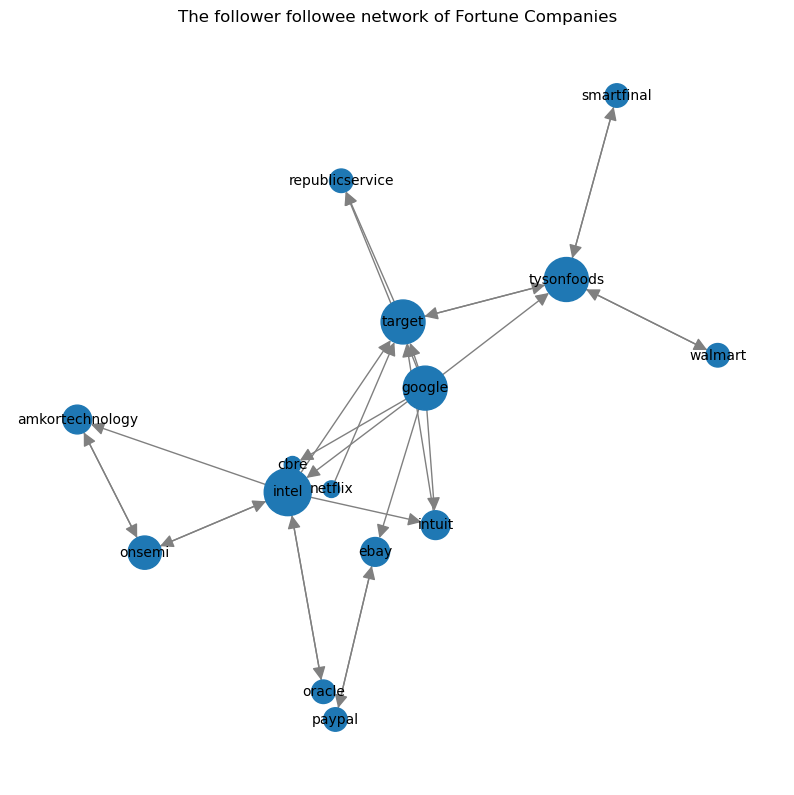

In [125]:
# Build a network from the adjacency matrix

df1 = df.astype(int)
df1
df1_long = df1.reset_index().melt(id_vars = 'index',var_name='to',value_name='weights')
df_long = df1_long[df1_long['weights'] != 0]
G = nx.convert_matrix.from_pandas_edgelist(df_long,source='index',target='to',
                        edge_attr='weights',create_using=nx.DiGraph())


figure(figsize=(10,10), dpi=100)
edge_color = 'grey'
pos=nx.kamada_kawai_layout(G)
node_size= [x * 2000 for x in nx.degree_centrality(G).values()]
arrowsize=20
nx.drawing.nx_pylab.draw_networkx(G,node_size = node_size,
                                    pos=pos,
                                    arrowsize=arrowsize,
                                    edge_color=edge_color,
                                    with_labels=True,
                                    font_size=10,
                                    arrows = True)
plt.title('The follower followee network of Fortune Companies')
plt.axis("off") 
plt.show()
# add your code here





In [140]:
# calculate centrality
from math import isnan
a=nx.in_degree_centrality(G)
{k: v for k, v in sorted(a.items(), key=lambda item: item[1],reverse=True)}
# calculate constraint
b = nx.constraint(G)
constraints_without_nan = {k: v for k, v in b.items() if not isnan(v)}
constraints = {k: v for k, v in sorted(b.items(), key=lambda item: item[1],reverse = True)}
print(constraints)


# # get the top accounts
top_indegree = max(a, key = a.get)
top_constraint = min(constraints, key = constraints.get)
print("")
print(top_indegree)
print(top_constraint)

{'target': 0.3571428571428571,
 'tysonfoods': 0.2857142857142857,
 'intel': 0.21428571428571427,
 'republicservice': 0.14285714285714285,
 'amkortechnology': 0.14285714285714285,
 'onsemi': 0.14285714285714285,
 'ebay': 0.14285714285714285,
 'intuit': 0.14285714285714285,
 'walmart': 0.07142857142857142,
 'smartfinal': 0.07142857142857142,
 'cbre': 0.07142857142857142,
 'paypal': 0.07142857142857142,
 'oracle': 0.07142857142857142,
 'google': 0.0,
 'netflix': 0.0}

{'smartfinal': 1.0, 'republicservice': nan, 'amkortechnology': 1.0069444444444444, 'walmart': 1.0, 'cbre': nan, 'paypal': 1.0, 'oracle': 1.0, 'netflix': 1.0, 'onsemi': 0.7608506944444444, 'ebay': 0.5555555555555556, 'intuit': 0.5408871882086166, 'intel': 0.33003826530612246, 'target': 0.3208226317737979, 'tysonfoods': 0.2907122032486464, 'google': 0.2812557846267758}

target
google


### Bonus question:
 * Define a functionn to scrape the most recent (the recent week, but you can go beyond a bit if in one call you get a few) **original** (exclude retweets) tweets from multiple accouts.
 * For each tweet, grab "id","created_at","full_text","user.screen_name".
 * Make a dataframe and return the dataframe.
 * Use the function to get the original tweets of the top twp accounts from Q2. 


In [121]:
# scrape recent tweets



